In [1]:
%%time
%matplotlib inline

import pandas as pd
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

CPU times: user 791 ms, sys: 255 ms, total: 1.05 s
Wall time: 1.34 s


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%%time
df = pd.read_csv('/Users/christopherpan 1/Desktop/All_Data/Train_Test_Set3/train_1_600_rnd3.csv',sep="|")

CPU times: user 765 ms, sys: 58.6 ms, total: 823 ms
Wall time: 832 ms


In [3]:
%%time
df.shape

CPU times: user 24 µs, sys: 1e+03 ns, total: 25 µs
Wall time: 28.8 µs


(600, 6486)

In [6]:
df.drop(df.columns[0], axis = 1) 

,file_name,C2752075,C2752077,C2752078,C2752081,C2752086,C2752089,C2752147,C2752148,C2752151,...,C3266800,C3266812,C3266814,C3266816,C3266817,file_name_intagged,CUI,Old_Tag,Max_Tag,Avg_Tag
0,320,0,0,0,0,0,0,0,0,0,...,6,6,7,7,8,320,C0522224,0.340722,0.340722,0.340722
1,1245884-overview,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,1245884-overview,C0016658,0.358149,0.358149,0.292662
2,244082-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,244082-overview,C0022658,0.451807,0.451807,0.164761
3,794789-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,794789-overview,C0042571,0.402176,0.402176,0.281783
4,193031-overview,0,0,0,0,0,0,0,0,0,...,8,8,9,9,9,193031-overview,C0543467,0.345770,0.345770,0.237174
5,23606,0,0,0,0,0,0,0,0,0,...,4,4,4,4,5,23606,C0013216,0.320083,0.320083,0.281327
6,1062235-overview,0,0,0,0,0,0,0,0,0,...,6,7,7,7,9,1062235-overview,C0011849,0.493290,0.493290,0.456743
7,24738,0,0,0,0,0,0,0,0,0,...,6,7,7,7,7,24738,C0019064,0.337582,0.337582,0.337582
8,95444-overview,0,0,0,0,0,0,0,0,0,...,7,7,7,9,9,95444-overview,C0038045,0.308301,0.308301,0.189647
9,27750,0,0,0,0,0,0,0,0,0,...,2,3,3,4,5,27750,C0497327,0.531273,0.531273,0.388607


In [7]:
%%time
df['Max_Tag'].describe()

CPU times: user 5.82 ms, sys: 2.51 ms, total: 8.33 ms
Wall time: 6.76 ms


count    600.000000
mean       0.207418
std        0.114129
min       -0.032693
25%        0.123443
50%        0.190950
75%        0.281427
max        0.613265
Name: Max_Tag, dtype: float64

CPU times: user 254 ms, sys: 14.6 ms, total: 268 ms
Wall time: 283 ms


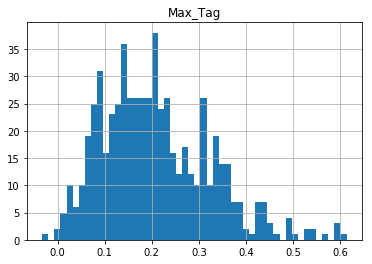

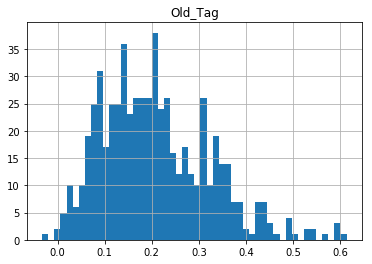

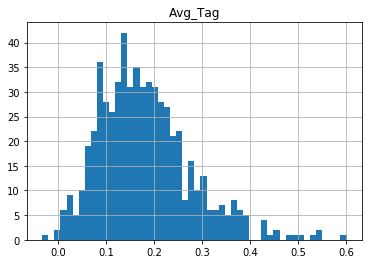

In [8]:
%%time
df.hist(column='Max_Tag', bins=50)
df.hist(column='Old_Tag', bins=50)
df.hist(column='Avg_Tag', bins=50)

In [9]:
%%time
df.isnull().values.any()

CPU times: user 14.6 ms, sys: 6.42 ms, total: 21 ms
Wall time: 14.1 ms


False

In [10]:
%%time
print('y <= 0.00       : ',len(df[(df['Max_Tag']<=0)]), 100*len(df[(df['Max_Tag']<=0)])/17248.0)
print('0.00 < y <= 0.05: ',len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)]), 100*len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)])//600.0)
print('0.05 < y <= 0.10: ',len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)]), 100*len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)])/600.0)
print('0.10 < y <= 0.20: ',len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)]), 100*len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)])/600.0)
print('0.20 < y <= 0.30: ',len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)]), 100*len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)])/600.0)
print('0.30 < y <= 0.40: ',len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)]), 100*len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)])/600.0)
print('0.40 < y <= 0.50: ',len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)]), 100*len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)])/600.0)
print('0.50 < y <= 0.60: ',len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)]), 100*len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)])/600.0)
print('0.60 < y <= 0.70: ',len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)]), 100*len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)])/600.0)
print('0.70 < y <= 0.80: ',len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)]), 100*len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)])/600.0)
print('0.80 < y <= 0.90: ',len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)]), 100*len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)])/600.0)
print('0.90 < y <= 1.00: ',len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)]), 100*len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)])/600.0)
print('1.00 < y <= 1.10: ',len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)]), 100*len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)])/600.0)

y <= 0.00       :  1 0.005797773654916512
0.00 < y <= 0.05:  25 4.0
0.05 < y <= 0.10:  87 14.5
0.10 < y <= 0.20:  200 33.333333333333336
0.20 < y <= 0.30:  152 25.333333333333332
0.30 < y <= 0.40:  101 16.833333333333332
0.40 < y <= 0.50:  25 4.166666666666667
0.50 < y <= 0.60:  8 1.3333333333333333
0.60 < y <= 0.70:  1 0.16666666666666666
0.70 < y <= 0.80:  0 0.0
0.80 < y <= 0.90:  0 0.0
0.90 < y <= 1.00:  0 0.0
1.00 < y <= 1.10:  0 0.0
CPU times: user 74.6 ms, sys: 19.4 ms, total: 94 ms
Wall time: 91 ms


In [11]:
df['Bin_tag'] = (df['Max_Tag'] > 0.3)
df['Bin_tag'].astype(object).replace({False:'0',True:'1'})

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
570    0
571    0
572    0
573    0
574    0
575    0
576    0
577    0
578    0
579    0
580    0
581    0
582    0
583    1
584    0
585    0
586    0
587    0
588    0
589    0
590    0
591    0
592    0
593    0
594    0
595    1
596    0
597    0
598    0
599    0
Name: Bin_tag, Length: 600, dtype: object

In [12]:
clean_frame_train = df.drop(['file_name', 'file_name_intagged', 'CUI', 'Old_Tag', 'Avg_Tag', 'Max_Tag'], axis=1, inplace=False)

In [13]:
from sklearn.model_selection import train_test_split

y = clean_frame_train.Bin_tag
#X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train_2, y, stratify = true, test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train, y, test_size=0.20)

X_tr = X_train.drop(['Bin_tag'], axis=1)
X_vl = X_valid.drop(['Bin_tag'], axis=1)

X_tr = X_tr.as_matrix()
X_vl = X_vl.as_matrix()

y_tr = y_train.as_matrix()
y_vl = y_valid.as_matrix()

AttributeError: 'DataFrame' object has no attribute 'Bin_Tag'

In [ ]:
clean_frame_train_2 = clean_frame_train.drop(['Bin_Tag'], axis=1, inplace=False)

In [34]:
alphas = 10**np.linspace(6,-2,50)*0.5
alphas

array([5.00000000e+05, 3.43324423e+05, 2.35743318e+05, 1.61872877e+05,
       1.11149824e+05, 7.63208984e+04, 5.24056567e+04, 3.59842837e+04,
       2.47085668e+04, 1.69661089e+04, 1.16497591e+04, 7.99929360e+03,
       5.49270571e+03, 3.77156003e+03, 2.58973734e+03, 1.77824015e+03,
       1.22102655e+03, 8.38416468e+02, 5.75697700e+02, 3.95302161e+02,
       2.71433772e+02, 1.86379686e+02, 1.27977396e+02, 8.78755312e+01,
       6.03396320e+01, 4.14321386e+01, 2.84493301e+01, 1.95346997e+01,
       1.34134790e+01, 9.21034985e+00, 6.32427608e+00, 4.34255687e+00,
       2.98181166e+00, 2.04745753e+00, 1.40588435e+00, 9.65348864e-01,
       6.62855683e-01, 4.55149089e-01, 3.12527596e-01, 2.14596713e-01,
       1.47352585e-01, 1.01179482e-01, 6.94747747e-02, 4.77047738e-02,
       3.27564278e-02, 2.24921633e-02, 1.54442180e-02, 1.06047544e-02,
       7.28174239e-03, 5.00000000e-03])

In [35]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_tr, y_tr)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_tr, y_tr)
print("mse = ",mean_squared_error(y_vl, ridge6.predict(X_vl)))
print("best model coefficients:")
pd.Series(ridge6.coef_, index=clean_frame_train_2.columns)

Alpha= 60.339632031966445
mse =  0.015398716960734794
best model coefficients:


Unnamed: 0   -7.928494e-08
C0000039      0.000000e+00
C0000052      0.000000e+00
C0000084      0.000000e+00
C0000096      0.000000e+00
C0000097      0.000000e+00
C0000098      0.000000e+00
C0000102      0.000000e+00
C0000119      0.000000e+00
C0000163      0.000000e+00
C0000165      0.000000e+00
C0000167      0.000000e+00
C0000172      0.000000e+00
C0000176      0.000000e+00
C0000215      0.000000e+00
C0000232      0.000000e+00
C0000248      0.000000e+00
C0000254      0.000000e+00
C0000257      0.000000e+00
C0000263      0.000000e+00
C0000266      0.000000e+00
C0000268      0.000000e+00
C0000289      0.000000e+00
C0000291      0.000000e+00
C0000294      0.000000e+00
C0000300      0.000000e+00
C0000325      0.000000e+00
C0000340      0.000000e+00
C0000343      0.000000e+00
C0000359      0.000000e+00
                  ...     
C3266592      8.337646e-06
C3266603     -4.114625e-06
C3266605     -5.160045e-06
C3266608     -2.225594e-06
C3266609     -1.415262e-06
C3266610      5.221568e-06
C

In [36]:
print("mse ridge = ",mean_squared_error(y_vl, ridge6.predict(X_vl)))
#print("mse lasso = ",mean_squared_error(y_test, lasso.predict(X_test)))

mse ridge =  0.015398716960734794


In [37]:
print(y_vl, ridge6.predict(X_vl))

[ 0.19954054  0.21567041  0.25585987  0.28361012  0.2013274   0.29898957
  0.09365984  0.20431753  0.14713393  0.23228616  0.15868889  0.29949888
  0.10613139  0.13872787  0.21725822  0.10743312  0.34601167  0.08183369
  0.13609335  0.14555735  0.2504669   0.33284157  0.05931606  0.09544967
  0.30568789  0.15949772  0.22703094  0.25220544  0.35049621  0.1818372
  0.37179083  0.2127953   0.35930686  0.09377125  0.2298089   0.28458897
  0.19298281  0.30755161  0.22076009  0.3260604   0.13057266  0.25864285
  0.09544967  0.25671685  0.08947936  0.08669865  0.37261884  0.12793484
  0.18658142  0.08218579  0.15839392  1.          0.21591235  0.25952966
  0.1378104   0.0964158   0.34467517  0.35333171  0.33496275  0.50766887
  0.35814866  0.2467785   0.50766887  0.36876162  0.34576978  0.40037074
  0.23431756  0.12531752  0.44459335  0.25869207  0.35814866  0.23845726
  0.30456987  0.17197295  0.07744653  0.2796483   0.42171181  0.25585987
  0.07712546 -0.0240179   0.07861445  0.0976457   0.

In [38]:
y_pred_vl = ridge6.predict(X_vl)

In [39]:
y_pred_vl.shape

(120,)

In [40]:
ridge6.score(X_vl, y_vl, sample_weight=None)

0.05211926928265321

Coefficients: 
 [-5.61713893e-06  0.00000000e+00  0.00000000e+00 ...  8.17955912e-05
  6.46662821e-05  6.08845344e-05]
Mean squared error: 0.01
Variance score: 0.15


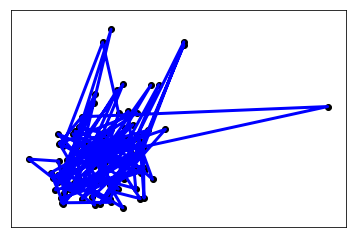

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#regr = linear_model.LinearRegression()

regr = linear_model.Ridge(alpha=100000)

#regr = RandomForestRegressor(n_estimators = 100, max_depth=10, random_state=0)

#regr = GradientBoostingRegressor(n_estimators = 500, max_depth=20, random_state=0)

regr.fit(X_tr, y_tr)

pred_y_val = regr.predict(X_vl)

#Disable for RandomForest
print('Coefficients: \n', regr.coef_)

#print(regr.feature_importances_)

print("Mean squared error: %.2f"
      % mean_squared_error(y_vl, pred_y_val))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_vl, pred_y_val))

# Plot outputs
plt.scatter(y_vl, pred_y_val,  color='black')
plt.plot(y_vl, pred_y_val, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()